<a href="https://colab.research.google.com/github/ramaraghava13/Machine-Learning/blob/main/ML_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Regression**

In [1]:
# ==========================================
# REGRESSION, REGULARIZATION, AND CROSS-VALIDATION
# ==========================================
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score


In [2]:

# ==========================================
# (a) Load the data and create X, y
# ==========================================
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=4, n_redundant=1, random_state=42
)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)




Shape of X: (1000, 5)
Shape of y: (1000,)


In [4]:
# ==========================================
# (b) Split data into train (80%) and test (20%)
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
# ==========================================
# (c) Objective of Logistic Regression with L2 Regularization
# ==========================================
"""
Objective function:
    J(w) = - (1/N) * Σ [ y_i * log(ŷ_i) + (1 - y_i) * log(1 - ŷ_i) ] + (λ/2) * ||w||²

where:
    ŷ_i = sigmoid(wᵀx_i) = 1 / (1 + e^(-wᵀx_i))
L2 regularization helps prevent overfitting by penalizing large weights.
"""


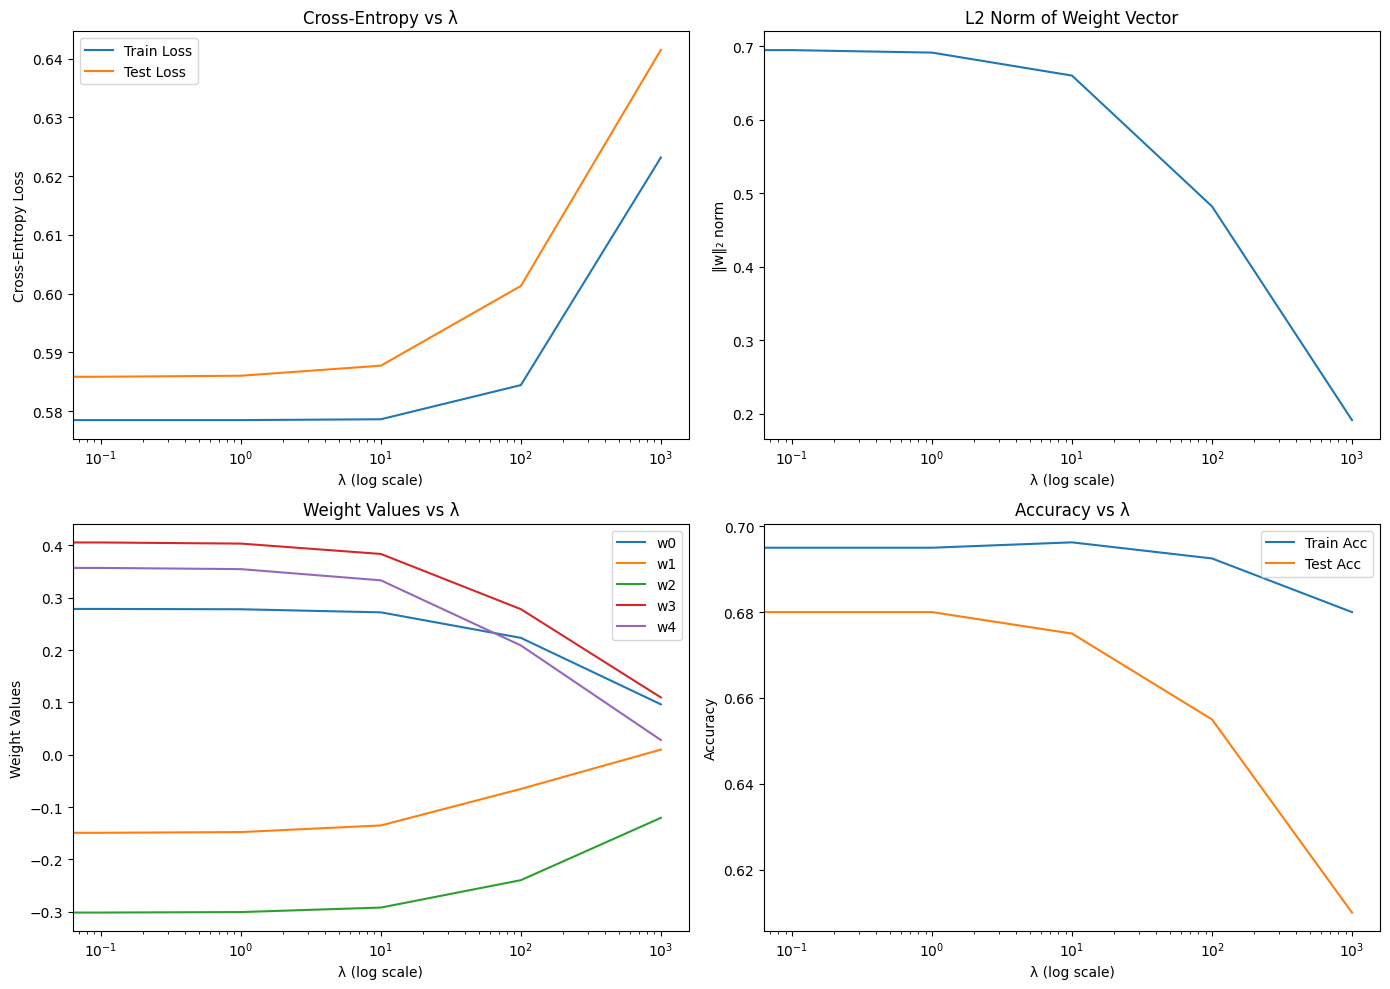


Observation:
- Small λ (weak regularization): high training accuracy, but possible overfitting.
- Large λ (strong regularization): weights shrink, underfitting may occur.
- Optimal λ achieves balance between training and testing performance.



In [5]:

# ==========================================
# (d) Logistic Regression with varying λ
# ==========================================
lambdas = [0, 0.1, 1, 10, 100, 1000]
train_loss, test_loss, weights_norm, train_acc, test_acc = [], [], [], [], []
weights_all = []

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
    else:
        model = LogisticRegression(penalty="l2", C=1 / lam, solver="lbfgs", max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    train_loss.append(log_loss(y_train, y_train_pred))
    test_loss.append(log_loss(y_test, y_test_pred))

    weights_norm.append(np.linalg.norm(model.coef_))
    train_acc.append(accuracy_score(y_train, (y_train_pred > 0.5)))
    test_acc.append(accuracy_score(y_test, (y_test_pred > 0.5)))
    weights_all.append(model.coef_[0])

# Convert to array for easy plotting
weights_all = np.array(weights_all)

# ==========================================
# PLOTS for part (d)
# ==========================================
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.semilogx(lambdas, train_loss, label="Train Loss")
plt.semilogx(lambdas, test_loss, label="Test Loss")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()

plt.subplot(2, 2, 2)
plt.semilogx(lambdas, weights_norm)
plt.xlabel("λ (log scale)")
plt.ylabel("‖w‖₂ norm")
plt.title("L2 Norm of Weight Vector")

plt.subplot(2, 2, 3)
for i in range(X.shape[1]):
    plt.semilogx(lambdas, weights_all[:, i], label=f"w{i}")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Values")
plt.title("Weight Values vs λ")
plt.legend()

plt.subplot(2, 2, 4)
plt.semilogx(lambdas, train_acc, label="Train Acc")
plt.semilogx(lambdas, test_acc, label="Test Acc")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()

plt.tight_layout()
plt.show()

print("\nObservation:")
print("- Small λ (weak regularization): high training accuracy, but possible overfitting.")
print("- Large λ (strong regularization): weights shrink, underfitting may occur.")
print("- Optimal λ achieves balance between training and testing performance.\n")

We vary the regularization parameter

𝜆
∈
{
0
,
0.1
,
1
,
10
,
100
,
1000
}
λ∈{0,0.1,1,10,100,1000}

and observe:

Cross-entropy (loss)

L2 norm of weights

Actual weight values

Accuracy

As λ increases:

Weights shrink towards zero (regularization effect).

Training loss increases slightly.

Test loss initially decreases (less overfitting), then increases again (underfitting).

Moderate λ gives the best generalization (bias–variance balance).

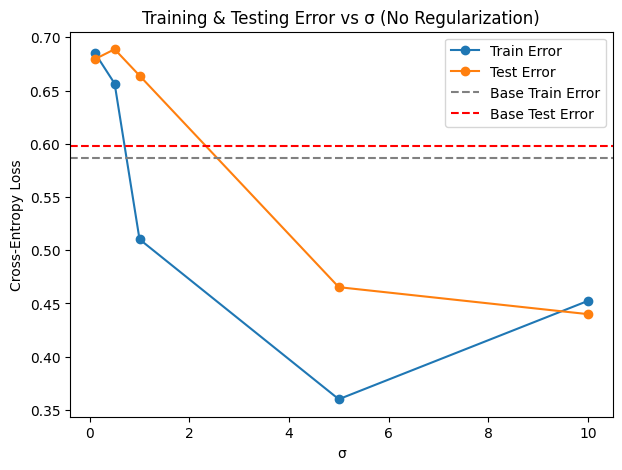

Observation:
- Small σ => basis functions are narrow, high variance → overfitting.
- Large σ => smoother basis, high bias → underfitting.
- Proper σ balances bias and variance.



In [6]:
# ==========================================
# (e,f) Gaussian Basis Functions
# ==========================================
def gaussian_basis_transform(X, sigma):
    mus = np.linspace(-10, 10, 5)  # 5 Gaussian centers
    X_new = []
    for j in range(X.shape[1]):
        for mu in mus:
            X_new.append(np.exp(-((X[:, j] - mu) ** 2) / (2 * sigma**2)))
    return np.column_stack(X_new)

sigmas = [0.1, 0.5, 1, 5, 10]
train_err_sigma, test_err_sigma = [], []

for sigma in sigmas:
    X_train_g = gaussian_basis_transform(X_train, sigma)
    X_test_g = gaussian_basis_transform(X_test, sigma)

    model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
    model.fit(X_train_g, y_train)

    y_train_pred = model.predict_proba(X_train_g)[:, 1]
    y_test_pred = model.predict_proba(X_test_g)[:, 1]

    train_err_sigma.append(log_loss(y_train, y_train_pred))
    test_err_sigma.append(log_loss(y_test, y_test_pred))

plt.figure(figsize=(7, 5))
plt.plot(sigmas, train_err_sigma, marker='o', label="Train Error")
plt.plot(sigmas, test_err_sigma, marker='o', label="Test Error")
plt.axhline(np.mean(train_loss), color="gray", linestyle="--", label="Base Train Error")
plt.axhline(np.mean(test_loss), color="red", linestyle="--", label="Base Test Error")
plt.xlabel("σ")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training & Testing Error vs σ (No Regularization)")
plt.legend()
plt.show()

print("Observation:")
print("- Small σ => basis functions are narrow, high variance → overfitting.")
print("- Large σ => smoother basis, high bias → underfitting.")
print("- Proper σ balances bias and variance.\n")


Small σ (narrow basis): Model fits fine details → overfitting → low train error, high test error.

Large σ (broad basis): Model is too smooth → underfitting → both errors high.

Optimal σ balances bias–variance trade-off

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


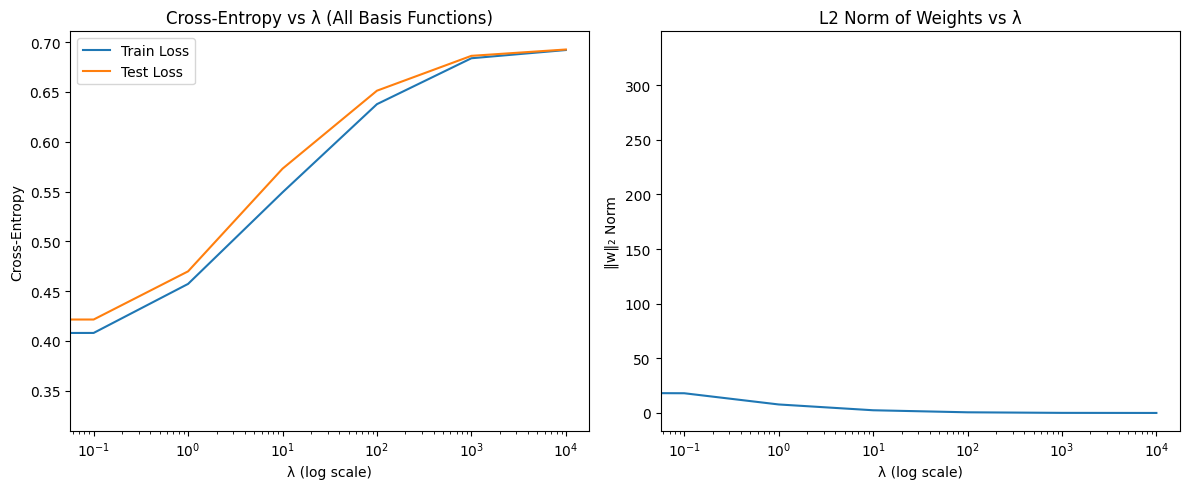

Observation:
- As λ increases, the weight norms shrink drastically.
- Regularization controls model complexity even with large basis expansions.



In [7]:
# ==========================================
# (g) Regularized Regression with all σ
# ==========================================
all_basis = []
for sigma in sigmas:
    all_basis.append(gaussian_basis_transform(X, sigma))
X_all = np.hstack(all_basis)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

lambdas_ext = [0, 0.1, 1, 10, 100, 1000, 10000]
train_loss_all, test_loss_all, weight_norm_all = [], [], []

for lam in lambdas_ext:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=1000)

    model.fit(X_train_all, y_train_all)

    y_train_pred = model.predict_proba(X_train_all)[:, 1]
    y_test_pred = model.predict_proba(X_test_all)[:, 1]

    train_loss_all.append(log_loss(y_train_all, y_train_pred))
    test_loss_all.append(log_loss(y_test_all, y_test_pred))
    weight_norm_all.append(np.linalg.norm(model.coef_))

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.semilogx(lambdas_ext, train_loss_all, label="Train Loss")
plt.semilogx(lambdas_ext, test_loss_all, label="Test Loss")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy")
plt.title("Cross-Entropy vs λ (All Basis Functions)")
plt.legend()

plt.subplot(1,2,2)
plt.semilogx(lambdas_ext, weight_norm_all)
plt.xlabel("λ (log scale)")
plt.ylabel("‖w‖₂ Norm")
plt.title("L2 Norm of Weights vs λ")
plt.tight_layout()
plt.show()

print("Observation:")
print("- As λ increases, the weight norms shrink drastically.")
print("- Regularization controls model complexity even with large basis expansions.\n")



In [ ]:
# ==========================================
# (h) Gaussian Basis Functions capturing relationships
# ==========================================
"""
To capture relationships between inputs, use *multivariate* Gaussian basis functions:
    φ(x) = exp( -½ (x - μ)ᵀ Σ⁻¹ (x - μ) )
This models correlations between features.
Impact:
- Increases model capacity → lower bias, but higher variance (overfitting risk).
- Needs regularization or more data to generalize well.
"""

# ==========================================
# (i) Adaptive Basis Function Placement (Learn μi)
# ==========================================
"""
To adapt the placement of μi:
1. Initialize μi randomly.
2. Alternate between:
    a) Fix μi and learn weights w via gradient descent (with L2 regularization)
    b) Fix w and update μi via gradient ascent on likelihood:
        μi ← μi + η * ∂J/∂μi
This is similar to an EM-like iterative algorithm.
"""

# ==========================================
# (j) Convergence
# ==========================================
"""
This algorithm converges to a *local optimum*, not a global one,
because the objective function is non-convex with respect to μi.
However, it will reduce the loss monotonically under small learning rates.
"""

## 2. **Linear & Logistic Regression**

1.Linear Regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
#Load Data
data = fetch_california_housing(as_frame=True)
df = data.frame
print(df.head())
print(df.info())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


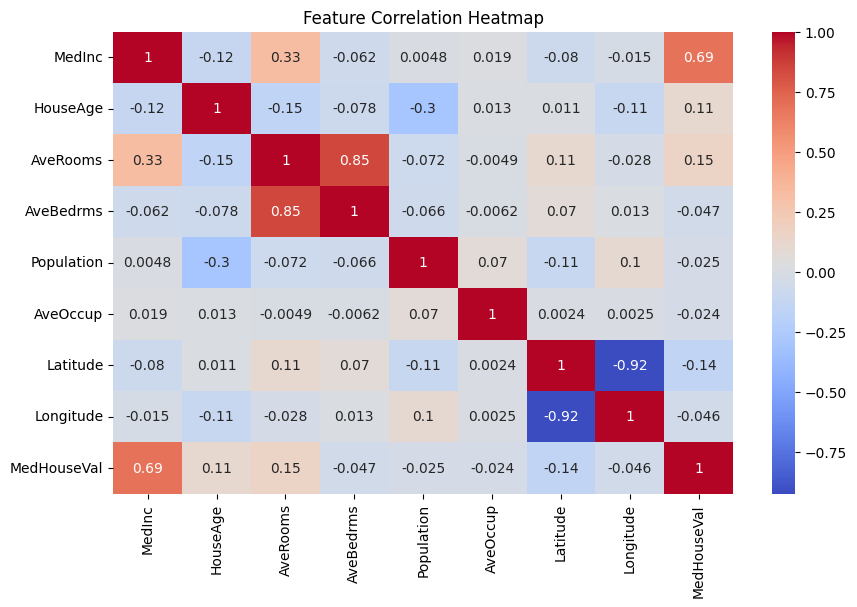

In [10]:
print(df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
#Split data
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
#Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
#Train Linear,Ridge and Lasso Regressions
lr = LinearRegression().fit(X_train_scaled, y_train)
ridge = Ridge(alpha=10).fit(X_train_scaled, y_train)
lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train)


In [14]:
#Evaluate models
models = {'Linear': lr, 'Ridge': ridge, 'Lasso': lasso}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Regression → MSE: {mse:.3f}, R²: {r2:.3f}")


Linear Regression → MSE: 0.556, R²: 0.576
Ridge Regression → MSE: 0.556, R²: 0.576
Lasso Regression → MSE: 0.548, R²: 0.582


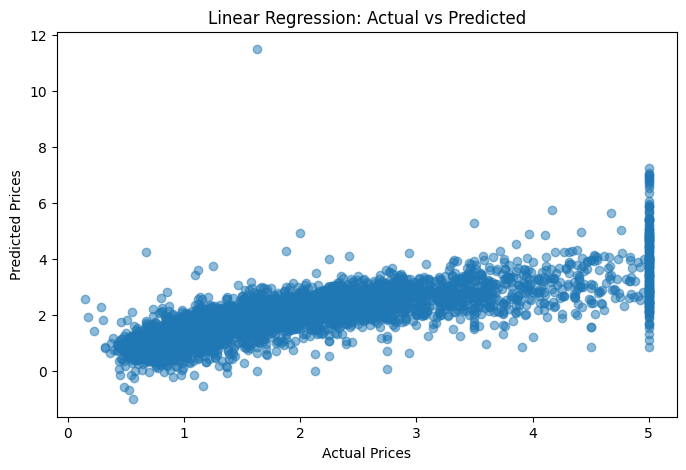

In [15]:
#Visualization
plt.figure(figsize=(8,5))
plt.scatter(y_test, lr.predict(X_test_scaled), alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


2.Logistic Regression

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


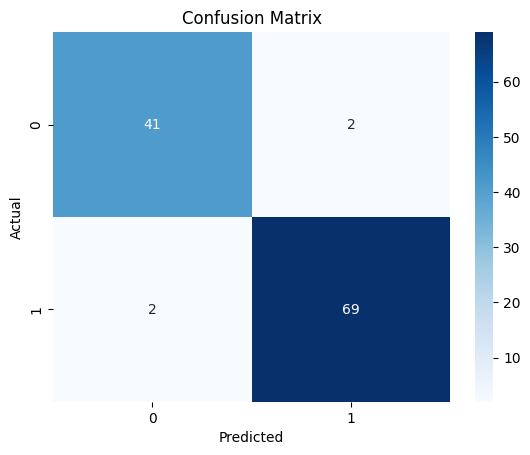

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer(as_frame=True)
df = data.frame
print(df.head())
print(df['target'].value_counts())

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'L2 Regularization': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000),
    'L1 Regularization': LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} → Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
